In [1]:
#importingLibraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

We have 614 rows and 13 columns in dataset

In [5]:
#checking the datatype of each column 
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

1. CoapplicantIncome,loan amount,loan amount term , credit history are float data type.
2. Application income is in integer data type and rest are object data type.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
df.keys()

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Checking the Null Values in the dataframe

In [9]:
# Checking the null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

<AxesSubplot:>

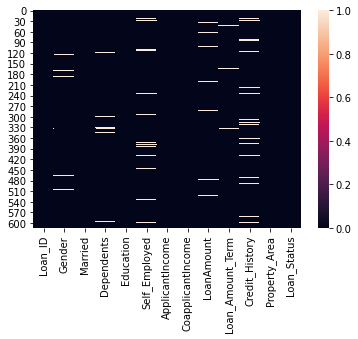

In [10]:
#checking null values using heat map
sn.heatmap(df.isnull())

their is null values present in Gender,Dependents,Self employed,Loan amount, 
loan amount term and credit history

In [11]:
# filling the missing values for numerical terms - mean
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].mean())
df['Loan_Amount_Term']=df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History']=df['Credit_History'].fillna(df['Credit_History'].mean())

In [12]:
# Filling the missing values for categorical terms - mode
df['Gender']=df['Gender'].fillna(df['Gender'].mode()[0])
df['Married']=df['Married'].fillna(df['Married'].mode()[0])
df['Dependents']=df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

In [13]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Our dataset has no missing value.

# Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

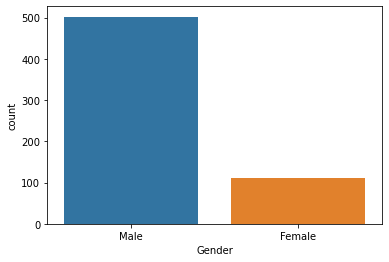

In [14]:
sn.countplot(df['Gender'])

The number of male applied for load is far more than female.

<AxesSubplot:xlabel='Married', ylabel='count'>

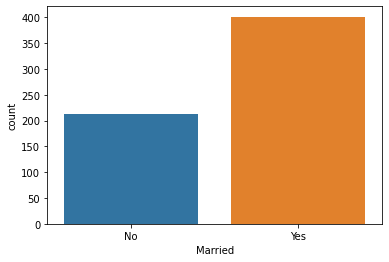

In [15]:
sn.countplot(df['Married'])

The chances of married people applying for the mode is more in comparison to unmarried people.

<AxesSubplot:xlabel='Self_Employed', ylabel='count'>

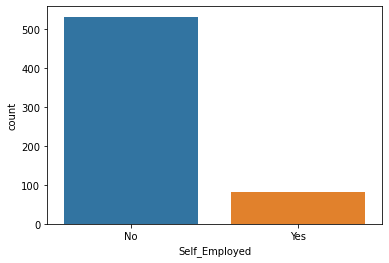

In [17]:
sn.countplot(df['Self_Employed'])

Very few peple are self employed majority of them is in jobs.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

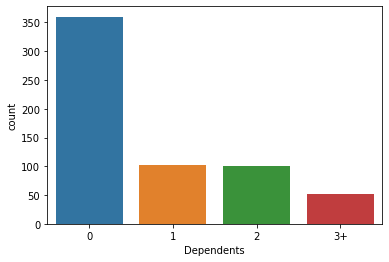

In [18]:
sn.countplot(df['Dependents'])

People are great in numbers who has no dependents.

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

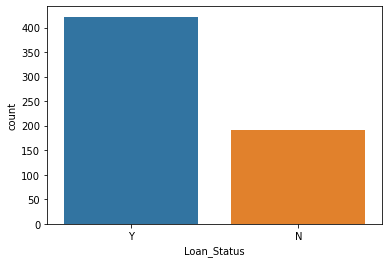

In [19]:
sn.countplot(df['Loan_Status'])

There is huge number of  approved case in comparison of rejection.

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

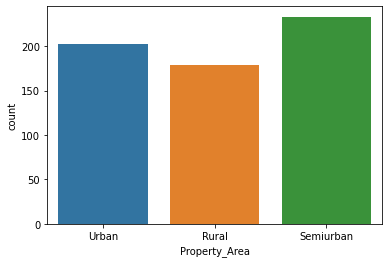

In [20]:
sn.countplot(df['Property_Area'])

the data is equally distributed for all the category.

In [23]:
#creating a histogram function
def histogram(data_frame,feature_name):
    plt.figure(figsize=(6,4))
    sn.set(style = "whitegrid")
    sn.distplot(data_frame[feature_name],kde=True)

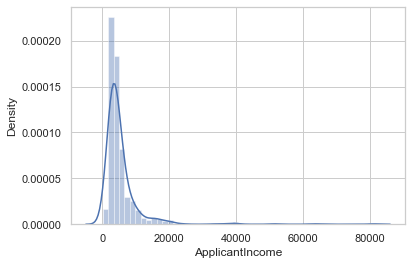

In [24]:
#ApplicantInccome
histogram(df,"ApplicantIncome")

the data is highly right skewed also it contains outliers.

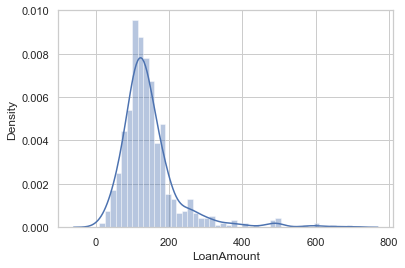

In [25]:
#loanAmount
histogram(df,"LoanAmount")

The data is highly right skewed also it contains outliers

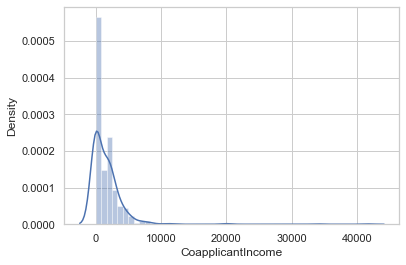

In [27]:
#CoapplicantIncome
histogram(df,"CoapplicantIncome")

The data is highly right skewd also it contains outliers.

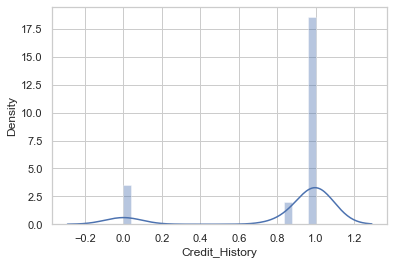

In [28]:
# Credit_history
histogram(df,"Credit_History")

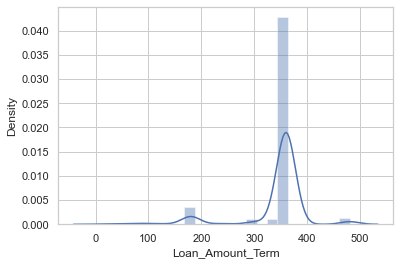

In [29]:
#loan_amount_term
histogram(df,"Loan_Amount_Term")

Majority of people wants there tenure of 350 months ad the data ranges from 180 to 480

<AxesSubplot:xlabel='Gender', ylabel='count'>

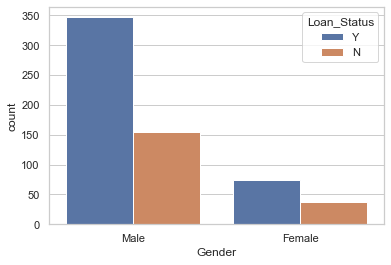

In [33]:
#Gender to Loan_status
sn.countplot("Gender",data=df,hue="Loan_Status")

Male applicants are more in number there rejection rate is also more than Female.

<AxesSubplot:xlabel='Dependents', ylabel='count'>

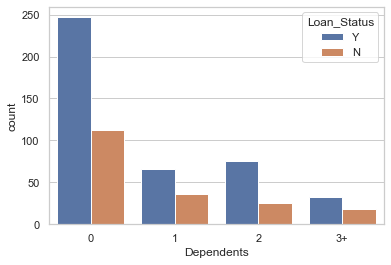

In [31]:
#Dependents to Loan_status
sn.countplot("Dependents", data=df, hue="Loan_Status")

The data is similar for all categories of approval and rejection of loan it is decreassing as the number of dependents is increasing

<AxesSubplot:xlabel='Married', ylabel='count'>

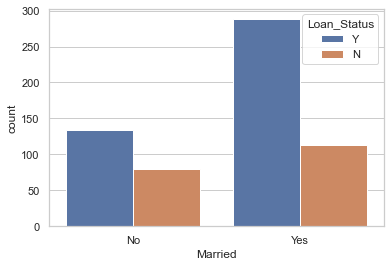

In [34]:
#Married to loan_status
sn.countplot("Married", data=df, hue="Loan_Status")

The approval rate of Married people is more than Unmarried people.

<AxesSubplot:xlabel='Education', ylabel='count'>

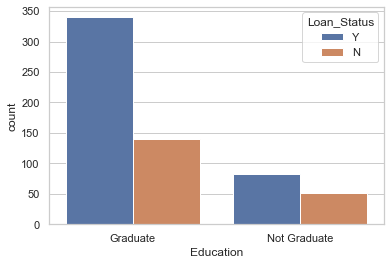

In [35]:
#education to loan_status
sn.countplot("Education", data=df, hue="Loan_Status")

people with graduation are more inclined towards getting a loan.

<AxesSubplot:xlabel='Gender', ylabel='count'>

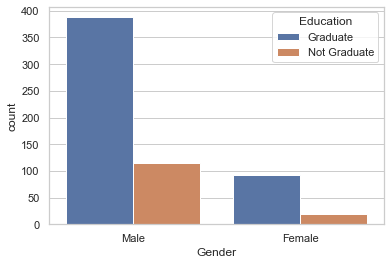

In [36]:
# Gender to Education
sn.countplot(x="Gender",hue="Education",data=df)

Male are more graduate then Female.

<AxesSubplot:xlabel='Gender', ylabel='count'>

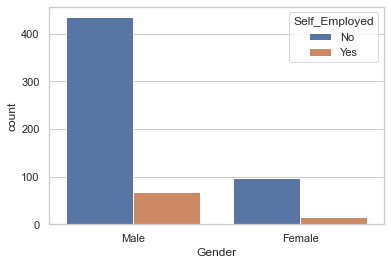

In [37]:
# Gender to Self Employed
sn.countplot(x="Gender",hue="Self_Employed",data=df)

Male are more employed then Female.

<AxesSubplot:xlabel='Gender', ylabel='count'>

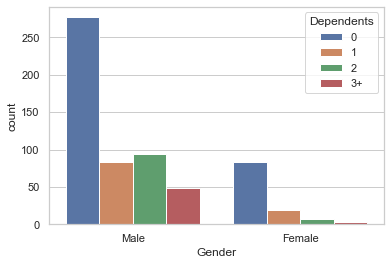

In [38]:
# Gender to Dependents
sn.countplot(x="Gender",hue="Dependents",data=df)

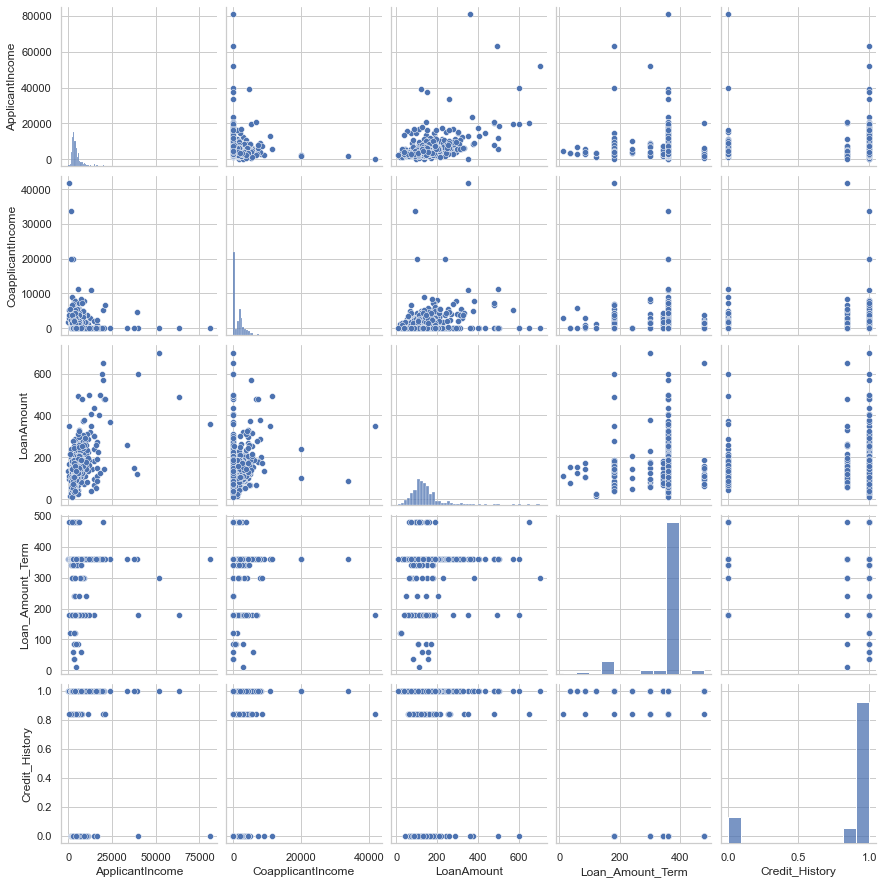

In [39]:
sn.pairplot(df)

# Data set into numerical category by using LabelEncoder

In [40]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
list1=['Gender','Loan_ID','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))

# Dropping unnecessary columns

In [41]:
df.drop(columns=["ApplicantIncome"],inplace=True)
df.drop(columns=["CoapplicantIncome"],inplace=True)

In [42]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,187.000000,360.0,1.0,2,1


In [43]:
df.describe()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,306.500000,0.817590,0.653094,0.744300,0.218241,0.133550,146.412162,342.000000,0.842199,1.037459,0.687296
std,177.390811,0.386497,0.476373,1.009623,0.413389,0.340446,84.037468,64.372489,0.349681,0.787482,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,12.000000,0.000000,0.000000,0.000000
25%,153.250000,1.000000,0.000000,0.000000,0.000000,0.000000,100.250000,360.000000,1.000000,0.000000,0.000000
50%,306.500000,1.000000,1.000000,0.000000,0.000000,0.000000,129.000000,360.000000,1.000000,1.000000,1.000000
75%,459.750000,1.000000,1.000000,1.000000,0.000000,0.000000,164.750000,360.000000,1.000000,2.000000,1.000000
max,613.000000,1.000000,1.000000,3.000000,1.000000,1.000000,700.000000,480.000000,1.000000,2.000000,1.000000


# Coorelation

<function matplotlib.pyplot.show(close=None, block=None)>

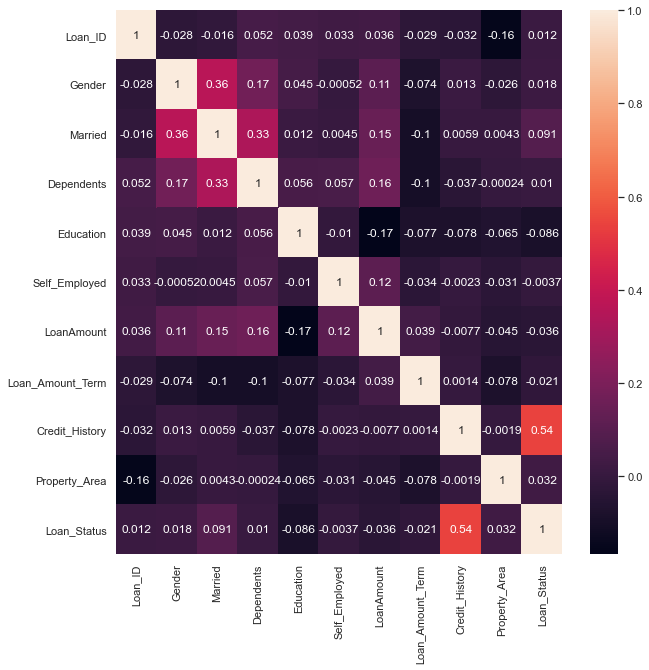

In [44]:
#Observing corelation between the columns through heatmap
plt.figure(figsize=(10,10))
sn.heatmap(df.corr(),annot=True)
plt.show

1.Negatively related with Education, self employed, loan amount, loan amount term and total income.
2.loan status is positively related with credit history, property area, married and dependents.

# Outliers

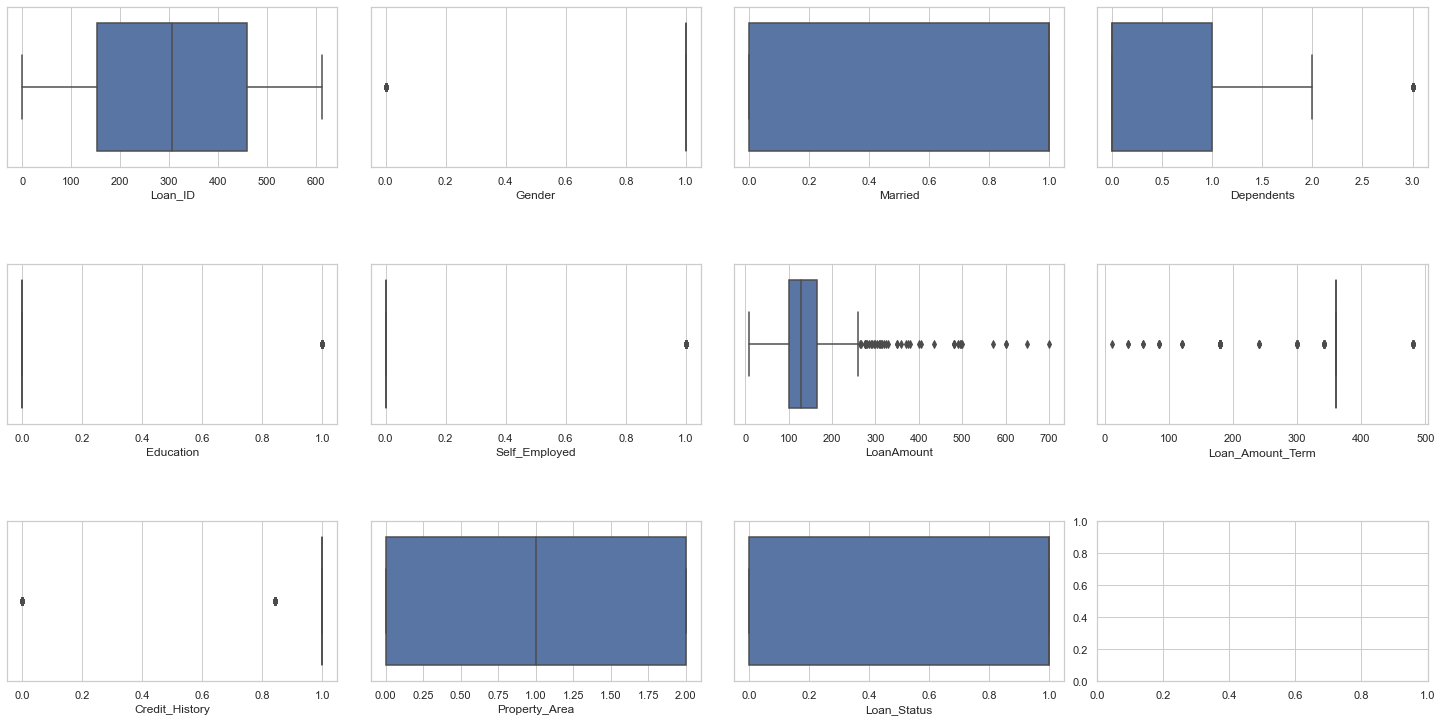

In [46]:
#ploting boxplot to check oultiers
fig, ax=plt.subplots(ncols=4,nrows=3, figsize=(20,10))
index=0
ax=ax.flatten()
for col, value in df.items():
    if col != "type":
        sn.boxplot(value, ax=ax[index])
        index+=1
plt.tight_layout(pad=0.5,w_pad=0.7,h_pad=5.0)

# Removing Outlier

In [47]:
print("The shape before removing outliers and skewness",df.shape)
print("skewness before removing outliers")
print(df.skew())
from scipy.stats import zscore
z=np.abs(zscore(df))
df=df[(z<3).all(axis=1)]
print("new shape after removing outliers",df.shape)
print("skewness after removing outliers")
print(df.skew())

The shape before removing outliers and skewness (614, 11)
skewness before removing outliers
Loan_ID             0.000000
Gender             -1.648795
Married            -0.644850
Dependents          1.015551
Education           1.367622
Self_Employed       2.159796
LoanAmount          2.726601
Loan_Amount_Term   -2.389680
Credit_History     -1.963600
Property_Area      -0.066196
Loan_Status        -0.809998
dtype: float64
new shape after removing outliers (587, 11)
skewness after removing outliers
Loan_ID             0.007276
Gender             -1.635333
Married            -0.626259
Dependents          1.037749
Education           1.333145
Self_Employed       2.235774
LoanAmount          1.239183
Loan_Amount_Term   -2.088428
Credit_History     -1.930459
Property_Area      -0.057282
Loan_Status        -0.797761
dtype: float64


# Splitting the data into input and target

In [48]:
x=df.drop('Loan_Status',axis=1)
y=df['Loan_Status']

In [49]:
x.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,0,0,0,146.412162,360.0,1.0,2
1,1,1,1,1,0,0,128.000000,360.0,1.0,0
2,2,1,1,0,0,1,66.000000,360.0,1.0,2
3,3,1,1,0,1,0,120.000000,360.0,1.0,2
4,4,1,0,0,0,0,141.000000,360.0,1.0,2


In [50]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int32

In [51]:
print(x.shape)
print(y.shape)

(587, 10)
(587,)


In [52]:
y=y.values.reshape(-1,1)

In [53]:
y.shape

(587, 1)

In [54]:
#Using standard scaler 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(x))

StandardScaler()


# Removing Skewness

In [55]:
#Reducing Skewness of the data set
for i in x.columns:
    if x.skew().loc[i]>0.55:
        x[i]=np.log1p(x[i])

In [56]:
x.skew()

Loan_ID             0.007276
Gender             -1.635333
Married            -0.626259
Dependents          0.695828
Education           1.333145
Self_Employed       2.235774
LoanAmount         -0.603621
Loan_Amount_Term   -2.088428
Credit_History     -1.930459
Property_Area      -0.057282
dtype: float64

# Find the Best Model

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,f1_score, classification_report, roc_auc_score, roc_curve,auc

In [58]:
def max_acc_score(clf,x,y):
    max_acc_score=0
    for i in range(42,101):
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state= i ,test_size=0.20)
        clf.fit(x_train,y_train)
        pred=clf.predict(x_test)
        acc_score=accuracy_score(pred,y_test)
        
        if acc_score>max_acc_score:
            max_acc_score=acc_score
            final_i=i
    print("max acc score corresponding to",final_i,"is",max_acc_score)
    return final_i

In [59]:
lg=LogisticRegression()
max_acc_score(lg,x,y)

max acc score corresponding to 56 is 0.8728813559322034


56

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=53,test_size=0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(469, 10)
(469, 1)
(118, 10)
(118, 1)


# Hyper parameter tuning

In [61]:
lg=LogisticRegression()
parameters={'penalty':['l1','l2']}
gd=GridSearchCV(lg,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")

{'penalty': 'l2'}




In [62]:
#DecisionTreeClassifier
dtc=DecisionTreeClassifier()
parameters={'criterion':('gini','entropy')}
gd=GridSearchCV(dtc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")

{'criterion': 'entropy'}




In [63]:
# KNeighborsClassifier
knc=KNeighborsClassifier()
parameters={'n_neighbors':range(1,10)}
gd=GridSearchCV(knc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")

{'n_neighbors': 7}




In [66]:
# RandomForestClassifier
rfc=RandomForestClassifier()
parameters={"n_estimators":[10,50,100,120,150],"max_features": ["auto", "sqrt", "log2"]}
gd=GridSearchCV(rfc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")

{'max_features': 'log2', 'n_estimators': 120}




In [68]:
# AdaBoostClassifier
ada=AdaBoostClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150,200],"base_estimator":[lg,knc,dtc,rfc]}
gd=GridSearchCV(ada,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)

{'base_estimator': RandomForestClassifier(), 'learning_rate': 1, 'n_estimators': 50}


In [69]:
# GradientBoostingClassifier
gbc=GradientBoostingClassifier()
parameters={"learning_rate":[0.001,0.01,0.1,1],"n_estimators":[10,50,100,120,150]}
gd=GridSearchCV(gbc,parameters)
gd.fit(x_train,y_train)
print(gd.best_params_)
print("\n")

{'learning_rate': 0.1, 'n_estimators': 50}






The model score for LogisticRegression() are:
[1 1 1 0 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1
 1 0 0 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1
 1 0 1 0 1 1 1]
Accuracy score = 0.8220338983050848
The cv score is 0.8126611618137043

[[25  1]
 [20 72]]

              precision    recall  f1-score   support

           0       0.56      0.96      0.70        26
           1       0.99      0.78      0.87        92

    accuracy                           0.82       118
   macro avg       0.77      0.87      0.79       118
weighted avg       0.89      0.82      0.84       118



roc_auc_score 0.7709284627092846


AxesSubplot(0.125,0.808774;0.62x0.0712264)


The model score for KNeighborsClassifier(n_neighbors=7) are:
[1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 1 1 0 1

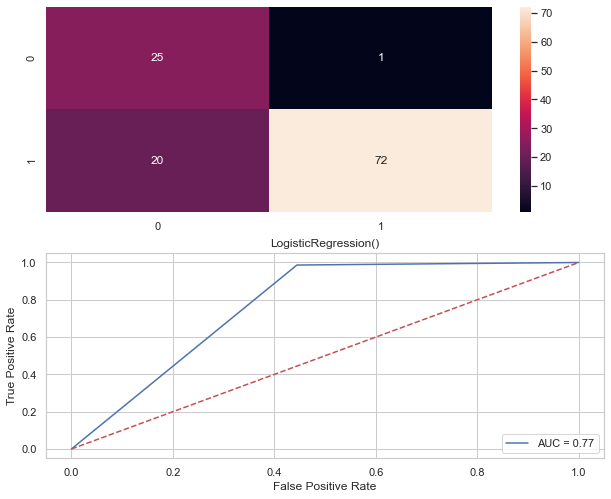

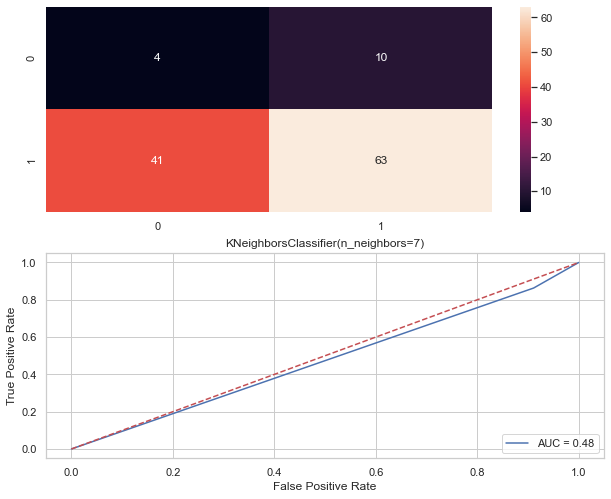

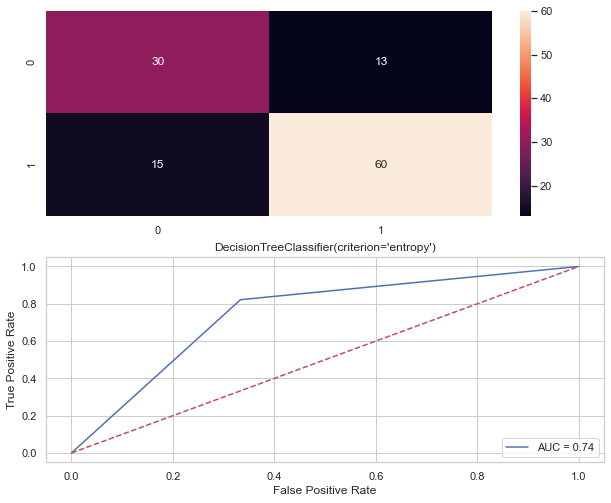

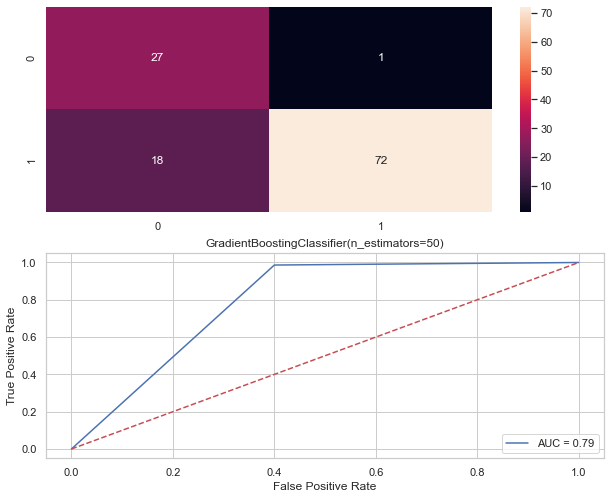

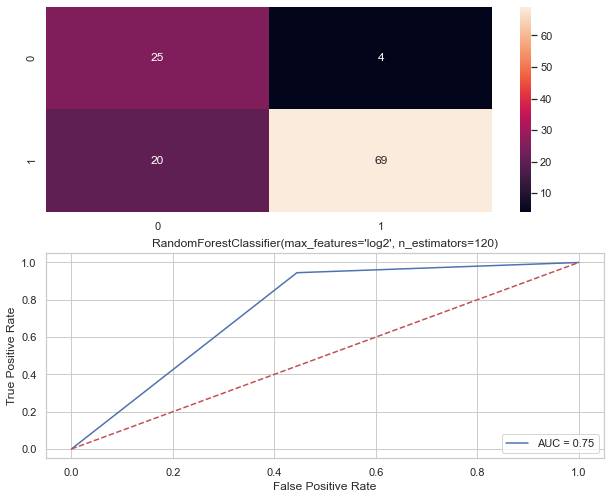

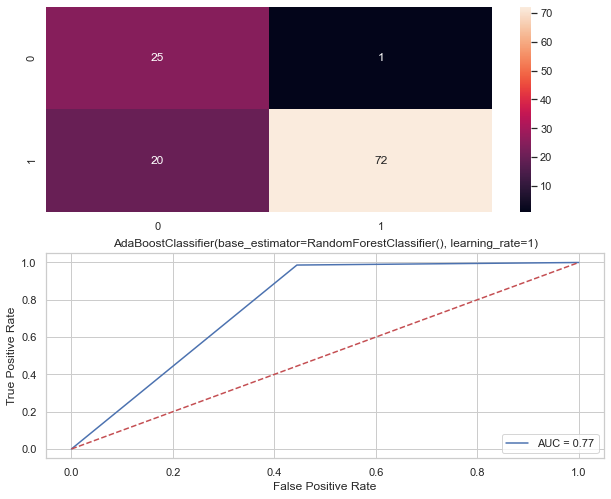

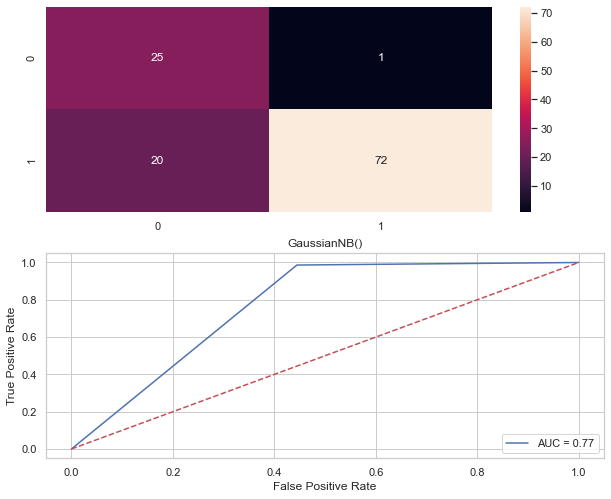

In [70]:
model=[]
score=[]
cvs=[]
rocscore=[]

for i in [LogisticRegression(penalty='l2'),KNeighborsClassifier(n_neighbors=7),
          DecisionTreeClassifier(criterion='entropy'),GradientBoostingClassifier(learning_rate=0.1,n_estimators=50),
          RandomForestClassifier(max_features='log2',n_estimators=120),
          AdaBoostClassifier(base_estimator= RandomForestClassifier() ,learning_rate =1, n_estimators = 50,),GaussianNB()]:
    k=i
    model.append(i)
    print("\n")
    print("The model score for",i,"are:")
    k.fit(x_train,y_train)
    k.score(x_train,y_train)
    predict=k.predict(x_test)
    print(predict)
    AS=accuracy_score(predict,y_test)
    print("Accuracy score =", AS)
    score.append(AS)
    cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
    print("The cv score is",cv_score)
    cvs.append(cv_score)
    print("")
    cm=confusion_matrix(predict,y_test)
    print(cm)
    print("")
    print(classification_report(predict,y_test))
    print("\n")
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predict)
    roc_auc=auc(false_positive_rate,true_positive_rate)
    print('roc_auc_score',roc_auc)
    rocscore.append(roc_auc)
    print("\n")
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    print(sn.heatmap(cm,annot=True))
    plt.subplot(912)
   
    plt.title(i)
    plt.plot(false_positive_rate,true_positive_rate,label='AUC = %0.2f'%roc_auc)
    plt.plot([0,1],[0,1],'r--')
    plt.legend(loc='lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [71]:
result=pd.DataFrame({'Model':['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','GradientBoostingClassifier','RandomForestClassifier','GaussianNB','AdaBoostClassifier'],'Accuracy_Score':score,'Cross_val_score':cvs,'Roc_auc_curve':rocscore})
result

,Model,Accuracy_Score,Cross_val_score,Roc_auc_curve
0,LogisticRegression,0.822034,0.812661,0.770928
1,KNeighborsClassifier,0.567797,0.634000,0.475951
2,DecisionTreeClassifier,0.762712,0.674837,0.744292
3,GradientBoostingClassifier,0.838983,0.661046,0.793151
4,RandomForestClassifier,0.796610,0.764957,0.750381
5,GaussianNB,0.822034,0.776836,0.770928
6,AdaBoostClassifier,0.822034,0.814385,0.770928


# From above DataFrame GradientBoostingClassifier is the best Performing Model.

In [72]:
gbc=GradientBoostingClassifier(learning_rate= 0.1, n_estimators= 50)
gbc.fit(x_train,y_train)
predict=gbc.predict(x_test)
AS=accuracy_score(predict,y_test)
print("Accuracy Score =",AS)
cv_score=cross_val_score(k,x,y,cv=5,scoring="accuracy").mean()
print("The CV Score =",cv_score)
false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,predict)
roc_auc=auc(false_positive_rate,true_positive_rate)
print('roc_auc_score',roc_auc)

Accuracy Score = 0.8389830508474576
The CV Score = 0.8143850499782703
roc_auc_score 0.7931506849315068


# Saving the Model

In [74]:
import joblib
joblib.dump(gbc,"Loan Prediction-Data.pkl")

['Loan Prediction-Data.pkl']